**0. install opensdpc when you use it at the first time in jupyter notebook**

In [3]:
import sys
!{sys.executable} -m pip install opensdpc



Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 34.4 MB 12.3 MB/s eta 0:00:01


**1. Use read_region() function to generate a patch**

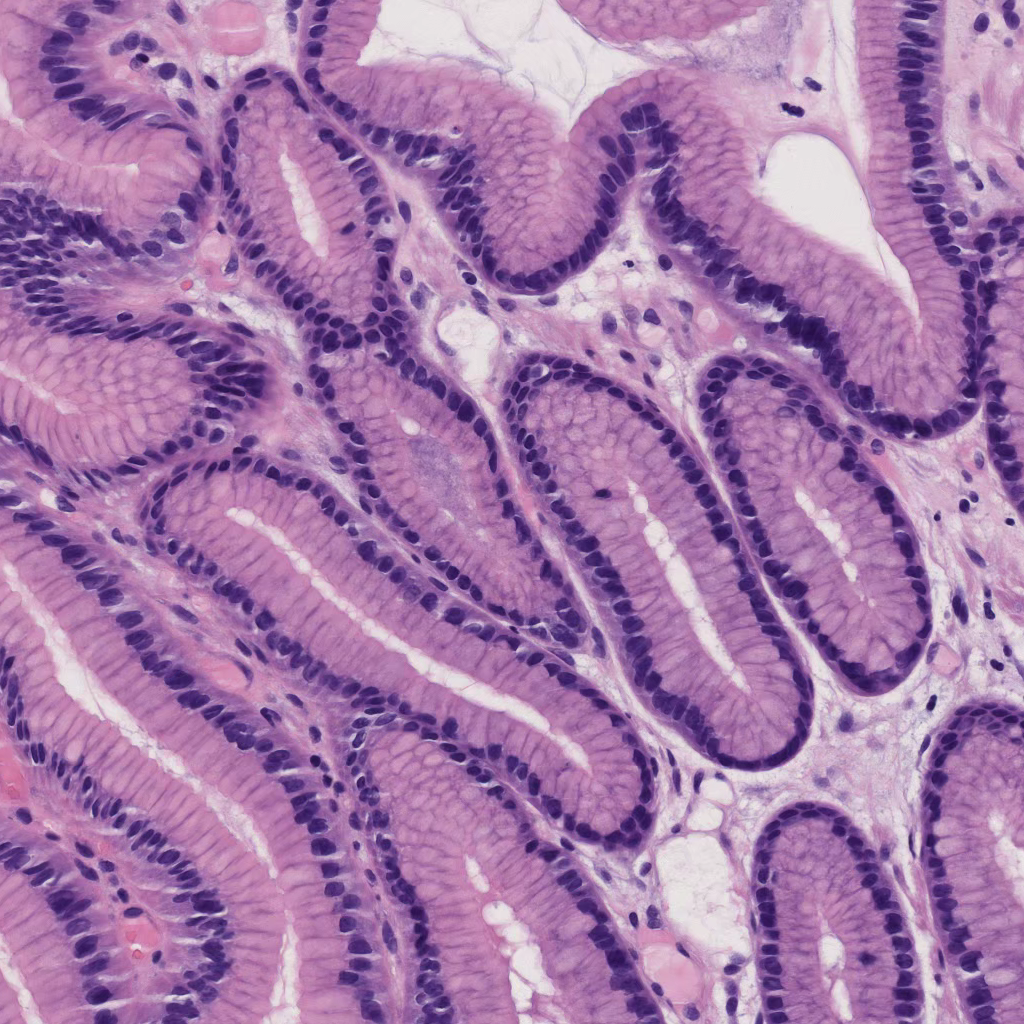

In [11]:
import opensdpc
import glob

slide_sdpc = opensdpc.OpenSdpc('20220514_145829_0.sdpc')
slide_svs = opensdpc.OpenSdpc('C3L-01663-21.svs')

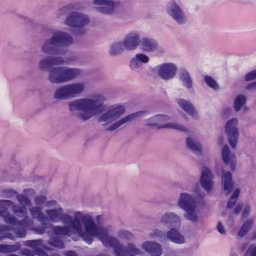

In [21]:
img_sdpc = slide_sdpc.read_region((10000, 5000), 1, (256, 256)).convert('RGB')
img_sdpc.show()

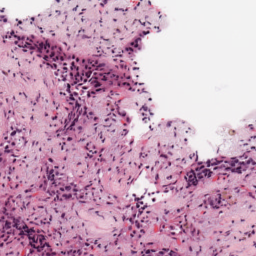

In [20]:
img_svs = slide_svs.read_region((8000, 5000), 1, (256, 256)).convert('RGB')
img_svs.show()

**2. Use opensdpc built-in function to generate patches (available in .sdpc only)**

In [4]:
import opensdpc
import glob

slide = opensdpc.OpenSdpc('20220514_145829_0.sdpc') # Import opensdpc and load the WSI

slide.crop_patches(tile_size=224, overlap_size=0, patch_level=1, save_dir='save_v1', blank_TH=0.7, is_mark=True, is_mask=True, patch_norm=False)

Start croping patches...Normalized patches is False
[20220514_145829_0] Processing: 370/720, --- 0 min 17 s 
Finish [20220514_145829_0]......Saving path: save_v1/20220514_145829_0/10x
The total number of patches: 370 (51.39% of 720) TIME: 0 min 17 s
Saved marked thumbnail....
Saved mask thumbnail....
End croping patches...


tile_size: patch size

overlap_size: overlapped size: recommend: 0

save_dir: path to save

blank_TH: crop patches with blank rate lower than blank_TH, recommend: 0.7, default=0.7

is_mark: whether the marked thumbnail is needed, default=True

is_mask: whether the mask of the marked thumbnail is needed, default=True

patch_norm: whether the normalized color of patches is needed, default=False. (select this will reduce time greatly)

**3. Use multiple threads to batch generate patches (available in .sdpc and .svs)**

run the following code in the `data/multiprocess` folder:
```
python create_wsi_list.py
python generate_patches.py --n_thread 2 --patch_w 224 --patch_h 224 # custom decide how many threads you want to use
```